# Data Science - Deep Learning for Real Estate Price Prediction

## Project Overview

In this project, we will use deep learning to predict real estate prices for home sales in King County, USA, from May 2014 to May 2015. Our analysis will factor in key attributes such as bedrooms, bathrooms, view, and square footage. By completing this hands-on project, you will:

- Develop expertise in applying deep learning for real estate price prediction.
- Gain practical insights directly relevant to the real estate industry.
- Enhance your project portfolio with a valuable addition for job interviews.

## Why Join This Project?

By participating in this data science project, you'll gain practical skills to enhance your data science expertise. Here's why it's beneficial for anyone aiming to improve their data science abilities:

- **Practical Guide for Google Advanced Data Analytics Capstone:** This project offers valuable hands-on guidance for individuals pursuing the Google Advanced Data Analytics certification program, enhancing your learning journey.

- **Practical Experience:** The real estate industry relies heavily on data analysis, making this project a valuable hands-on opportunity to learn skills relevant to a significant economic sector.

- **Deep Learning Proficiency:** Deep learning is a type of machine learning that mimics human brain functions. Mastering these techniques in a real estate context equips you to handle various data-related challenges effectively.

- **Strengthen Your Portfolio:** Completing a real-world project, whether you're new or experienced in data science, enhances your credibility. It provides concrete proof of your skills, making a positive impression in job interviews and discussions with potential clients.

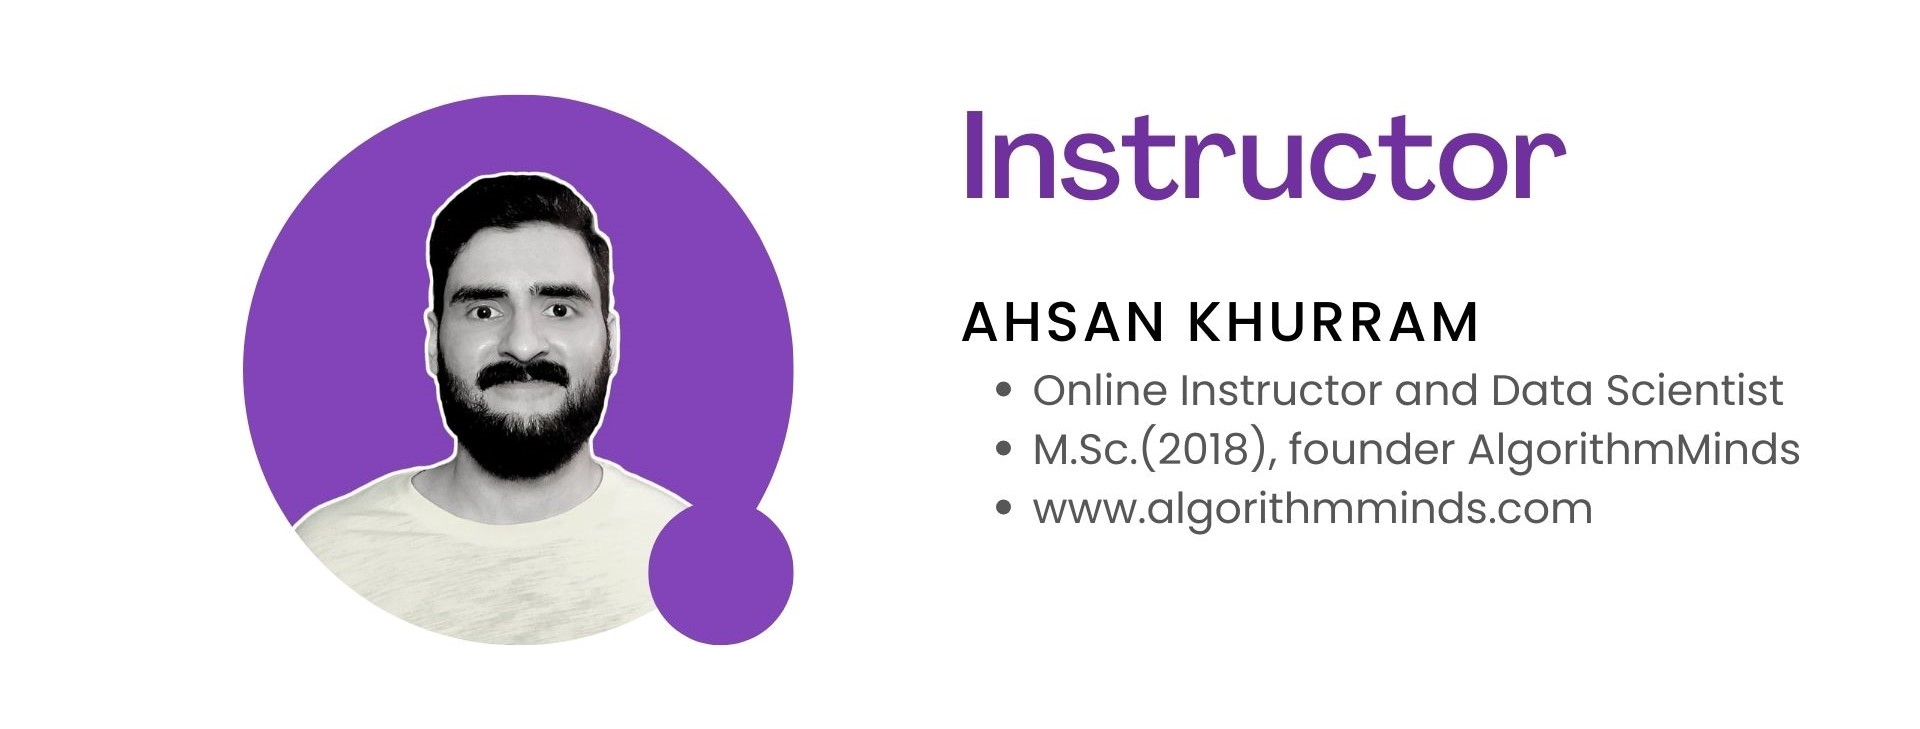

## Watch full Tutorial on YouTube: 

#### my website: www.algorithmminds.com

## Dataset 
Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains various features that provide information about different aspects of the houses in King County, USA from May 2014 to May 2015. 
- id: Unique identification number for each house.
- date: Date when the house was sold.
- price: The target variable, indicating the sale price of the house.
- bedrooms: Number of bedrooms in the house.
- bathrooms: Number of bathrooms in the house.
- sqft_living: Total square footage of the living space in the house.
- sqft_lot: Total square footage of the lot the house is situated on.
- floors: Total levels or floors in the house.
- waterfront: Indicates whether the house has a view of a waterfront.
- view: A rating indicating if the house has been viewed.
- condition: Overall condition rating of the house.
- grade: Overall grade given to the housing unit, based on the King County grading system.
- sqft_above: Square footage of the house apart from the basement.
- sqft_basement: Square footage of the basement in the house.
- yr_built: Year the house was built.
- yr_renovated: Year when the house was last renovated.
- zipcode: Zip code of the house's location.
- lat: Latitude coordinate of the house's location.
- long: Longitude coordinate of the house's location.
- sqft_living15: Living room area in 2015, implying some renovations.
- sqft_lot15: Lot size area in 2015, implying some renovations.


## Loading Essential Libraries

In this initial step of our data science journey, we'll set the foundation by importing the essential libraries required for our deep learning project on real estate price prediction. Libraries act as the building blocks of our project, providing us with pre-built functions and tools that simplify complex tasks. For this project, we'll be using Python, a popular programming language, along with various powerful libraries.

Let's take a moment to understand the purpose of each library we're importing:

- **pandas**: This library is a data manipulation and analysis powerhouse. It provides data structures to efficiently handle and process our dataset.
- **numpy**: A fundamental package for scientific computing in Python. It allows us to work with arrays and perform mathematical operations efficiently.
- **seaborn and matplotlib**: These visualization libraries help us create informative and visually appealing graphs and plots to better understand our data.
- **math**: This module includes mathematical functions beyond the basic arithmetic operations.

Next, we move on to the scikit-learn (sklearn) modules. Scikit-learn is a widely-used machine learning library that offers a range of tools for data preprocessing, model selection, and evaluation:

- **MinMaxScaler**: A preprocessing technique that scales our numerical features to a specific range, often between 0 and 1. This ensures uniformity and helps our model perform better.
- **train_test_split**: A function that splits our dataset into training and testing subsets. This is crucial for evaluating our model's performance on unseen data.
- **r2_score**, **mean_squared_error**, **mean_absolute_error**: These are evaluation metrics used to assess how well our model is performing. They provide insights into its predictive accuracy and generalization capabilities.

Finally, we will importe TensorFlow and Keras modules libraries for deep learning:

- **tensorflow.keras**: The Keras API within TensorFlow provides an easy and intuitive way to build, train, and deploy deep learning models.
- **Sequential**: A fundamental building block for creating sequential models in Keras.
- **Dense**: This layer represents a fully connected neural network layer. It plays a central role in constructing our deep learning architecture.

In [2]:

# Importing necessary libraries

import pandas as pd             
import numpy as np              
import seaborn as sns           
import matplotlib.pyplot as plt 
from   math import sqrt        

# Importing scikit-learn modules
from sklearn.preprocessing   import MinMaxScaler       # Data scaling
from sklearn.model_selection import train_test_split   # Train-test split
from sklearn.metrics         import r2_score, mean_squared_error, mean_absolute_error # Evaluation metrics

# Importing TensorFlow and Keras modules
import tensorflow.keras
from tensorflow.keras.models import Sequential    # Sequential model
from tensorflow.keras.layers import Dense         # Dense layer (Neural network)



### Import Dataset
Import the dataset using `pd.read_csv()` with appropriate encoding (`ISO-8859-1`).

In [3]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv', encoding = 'ISO-8859-1')

# encoding = 'ISO-8859-1'specifies the character encoding of the CSV file. 
# Ensures correct interpretation of characters from different languages.

# Data Preprocessing
Data preprocessing transforms the data into a format that is more easily and effectively processed in data mining, machine learning and other data science tasks.

In [4]:
df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Column names standarization and Underscore separated words
To maintain consistency and ease of use, we'll standardize the column names. We'll convert all column names to uppercase using the `map()` function and replace any white space separators with underscores. This step is essential as it ensures that our code interacts seamlessly with the column names, regardless of the case or spaces.

In [6]:
df.columns = map(str.upper, df.columns)                     # Convert all column names to uppercase
df.columns = [col.replace(' ', '_') for col in df.columns]  # Replace any white space separators by underscores
df.tail(5)

,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,...,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


### Converting Datetime format

In [7]:
# Convert the "DATE" column to datetime objects
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y%m%dT%H%M%S")
df.tail(5)

,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,...,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


### Check for null values in the dataset
Dealing with missing data is a critical part of data preparation. We'll create a mask of null values using the `.isnull()` function and calculate the total number of missing values. This insight will guide us in determining if and how we need to address these null values.

In [8]:

null_mask   = df.isnull()            # Create a mask of null values
null_values = null_mask.sum().sum()  # Count the total number of null values
print("Number of null values:", null_values)


Number of null values: 0


### Check for duplicates in the dataset

Duplicate data can skew our analysis and modeling results. We'll identify duplicate rows by creating a mask using `.duplicated()`. The total number of duplicate rows will help us gauge the extent of duplication in our dataset.

In [9]:
duplicates_mask = df.duplicated()       # Create a mask of duplicated rows
num_duplicates  = sum(duplicates_mask)  # Count the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


### Understanding the Dataset

Two important functions, `df.info()` and `df.describe()`, provide valuable insights into the structure and summary statistics of our dataset. The `info()` function offers a snapshot of the data types, non-null counts, and memory usage of each column. On the other hand, `describe()` presents key statistical measures such as mean, standard deviation, and quartiles for numeric columns, giving us a sense of the data's distribution.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             21613 non-null  int64         
 1   DATE           21613 non-null  datetime64[ns]
 2   PRICE          21613 non-null  float64       
 3   BEDROOMS       21613 non-null  int64         
 4   BATHROOMS      21613 non-null  float64       
 5   SQFT_LIVING    21613 non-null  int64         
 6   SQFT_LOT       21613 non-null  int64         
 7   FLOORS         21613 non-null  float64       
 8   WATERFRONT     21613 non-null  int64         
 9   VIEW           21613 non-null  int64         
 10  CONDITION      21613 non-null  int64         
 11  GRADE          21613 non-null  int64         
 12  SQFT_ABOVE     21613 non-null  int64         
 13  SQFT_BASEMENT  21613 non-null  int64         
 14  YR_BUILT       21613 non-null  int64         
 15  YR_RENOVATED   2161

In [11]:
df.describe()

,ID,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Exploratory Data Analysis

## Descriptive Statistics
We have our dataset ready for analysis. Let's dive into descriptive analysis to explore and summarize key aspects of the data, gaining insights into the real estate market.

Descriptive analysis sheds light on data patterns and trends. By asking specific questions and extracting information, we understand the dataset's characteristics. Let's explore fundamental questions:

- Average House Price: Calculate the average house price to understand central pricing tendency.
- Extreme Values: Find the cheapest and most expensive houses, identifying affordability and luxury options.
- Bedrooms and Bathrooms: Calculate average bedrooms and bathrooms to know the common property configuration.


In [12]:
# What is the average house price?
average_price = df['PRICE'].mean()

# What is the price of the cheapest house?
cheapest_price = df['PRICE'].min()

# What is the average number of bathrooms and bedrooms?
average_bathrooms = df['BATHROOMS'].mean()
average_bedrooms = df['BEDROOMS'].mean()

# What is the maximum number of bedrooms?
max_bedrooms = df['BEDROOMS'].max()

print("Cheapest house price is: ${:,.2f}".format(cheapest_price))
print("Average house price is : ${:,.2f}".format(average_price))
print("Average number of bathrooms is: {:.0f}".format(average_bathrooms))
print("Average number of bedrooms is : {:.0f}".format(average_bedrooms))
print("Maximum number of bedrooms is :", max_bedrooms)

Cheapest house price is: $75,000.00
Average house price is : $540,088.14
Average number of bathrooms is: 2
Average number of bedrooms is : 3
Maximum number of bedrooms is : 33


## Impact of Location on Real Estate Prices
This section delves into the connection between geographical location and real estate prices. By examining data based on ZIP codes, we gain insights into how different areas influence property values. We will achieve this by

- **Grouping Data:** Grouping data helps us explore patterns within categories. By grouping real estate data by ZIP code, we can uncover variations in property values across geographic regions.

- **Average Price Calculation:** We calculate average prices for each ZIP code, creating profiles of price averages in different areas. Higher averages may indicate upscale neighborhoods, while lower averages suggest more affordable locales.

- **Identifying Key ZIP Codes:** Sorting average prices in descending order reveals the top ZIP codes with the highest averages. These areas provide insights into premium real estate markets.

- **Visualizing Insights:** We use a bar plot to visualize average prices by ZIP code, making it easier to spot location-based trends and outliers.


Top 10 ZIP Codes with Highest Average Prices:
ZIP Code: 98039 | Average Price: $2,160,606.60
ZIP Code: 98004 | Average Price: $1,355,927.08
ZIP Code: 98040 | Average Price: $1,194,230.02
ZIP Code: 98112 | Average Price: $1,095,499.34
ZIP Code: 98102 | Average Price: $901,258.27
ZIP Code: 98109 | Average Price: $879,623.62
ZIP Code: 98105 | Average Price: $862,825.23
ZIP Code: 98006 | Average Price: $859,684.78
ZIP Code: 98119 | Average Price: $849,448.02


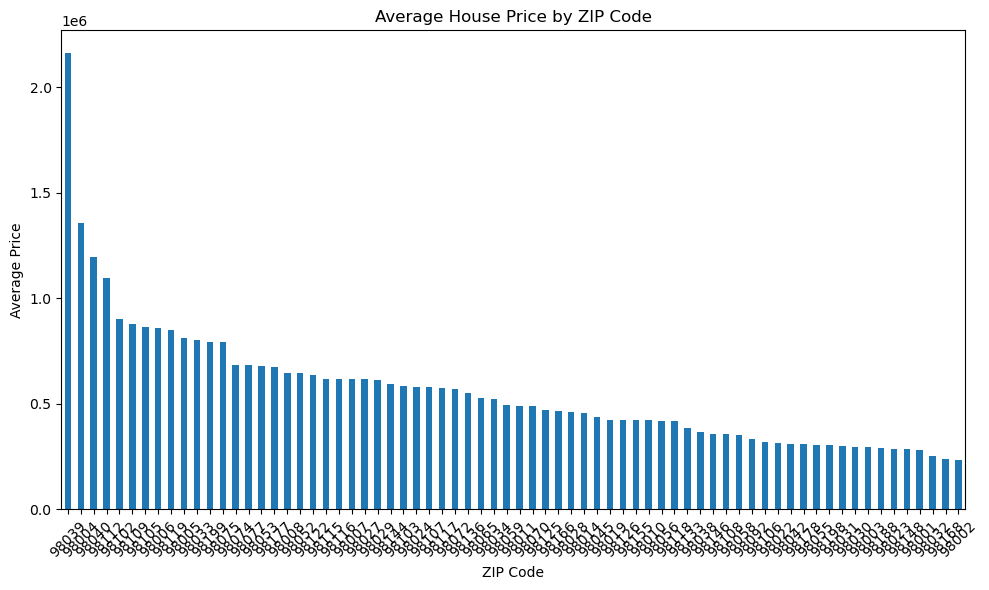

In [13]:
# Grouping the data by ZIP code and calculating the average price for each ZIP code
avg_price_by_zip = df.groupby('ZIPCODE')['PRICE'].mean()

# Sorting the results in descending order of average price
avg_price_by_zip      = avg_price_by_zip.sort_values(ascending=False)
top_10_zip_avg_prices = avg_price_by_zip[0:9]

# Print the top 10 ZIP codes along with their average prices
print("Top 10 ZIP Codes with Highest Average Prices:")
for zip_code, avg_price in top_10_zip_avg_prices.items():
    print("ZIP Code: {:>5} | Average Price: ${:,.2f}".format(zip_code, avg_price))

# Plotting the average prices by ZIP code
plt.figure(figsize=(10, 6))
avg_price_by_zip.plot(kind='bar')
plt.title('Average House Price by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Impact of House Features
In this section, we'll explore the relationship between different house features and their influence on real estate prices.

We'll examine how various features such as bedrooms, bathrooms, waterfront views, and house grade impact property prices. By analyzing these elements, we can better understand the driving factors behind real estate values.

### Bedrooms and Bathrooms
The number of bedrooms and bathrooms in a house affects its functionality and comfort. We'll calculate the average prices for different bedroom and bathroom configurations and present the findings using bar plots.

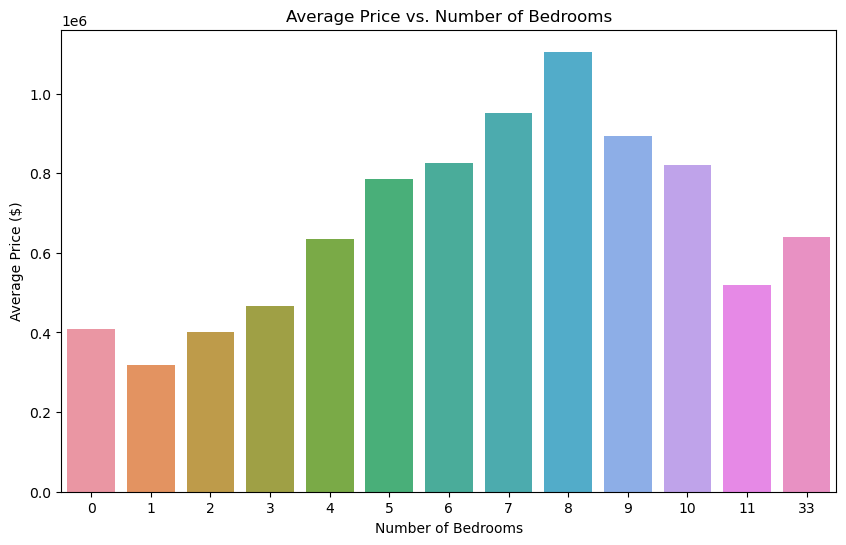

In [14]:
# Feature: Number of Bedrooms
# Calculate the average price for different numbers of bedrooms
avg_price_per_bedroom = df.groupby('BEDROOMS')['PRICE'].mean()

# Plot the average price per number of bedrooms
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_bedroom.index, y=avg_price_per_bedroom.values)
plt.title('Average Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price ($)')
plt.show()

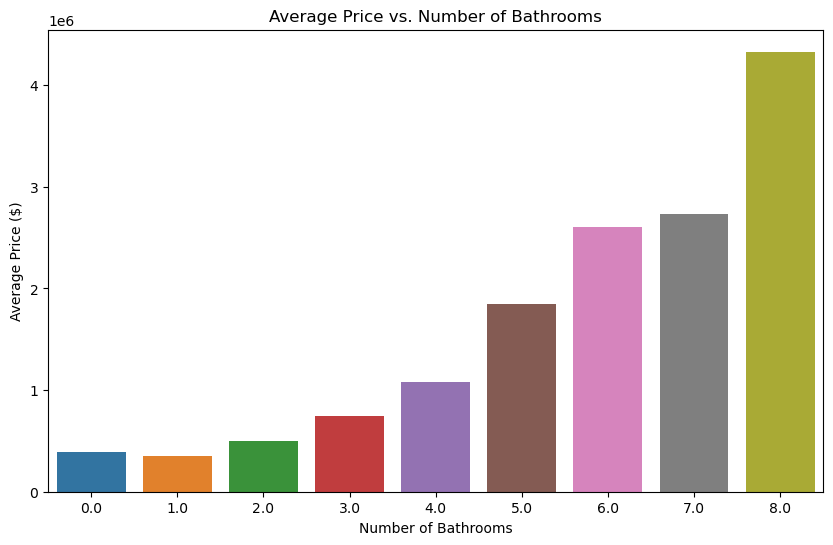

In [15]:
# Feature: Number of Bathrooms
# Calculate the average price for different numbers of bathrooms

df['BATHROOMS'] = df['BATHROOMS'].round()
avg_price_per_bathroom = df.groupby('BATHROOMS')['PRICE'].mean()

# Plot the average price per number of bathrooms
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_bathroom.index, y=avg_price_per_bathroom.values)
plt.title('Average Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price ($)')
plt.show()


### Waterfront Views
Houses with waterfront views are often associated with luxury and scenic beauty. We'll calculate the average prices for houses with and without waterfront views and visualize the premium associated with waterfront properties.

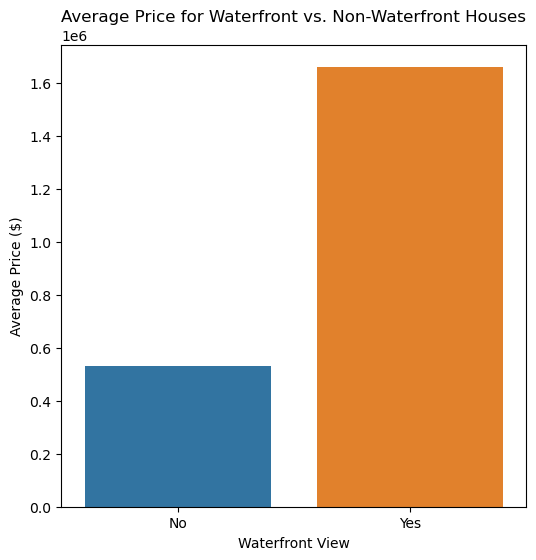

In [16]:
# Feature: Waterfront View
# Calculate the average price for houses with and without a waterfront view
avg_price_waterfront = df.groupby('WATERFRONT')['PRICE'].mean()

# Plot the average price for waterfront and non-waterfront houses
plt.figure(figsize=(6, 6))
sns.barplot(x=avg_price_waterfront.index, y=avg_price_waterfront.values)
plt.title('Average Price for Waterfront vs. Non-Waterfront Houses')
plt.xlabel('Waterfront View')
plt.ylabel('Average Price ($)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### House Grade Impact

A house's grade reflects its design, structure, and quality. We'll analyze how different house grades relate to pricing variations and present our findings using visualizations.

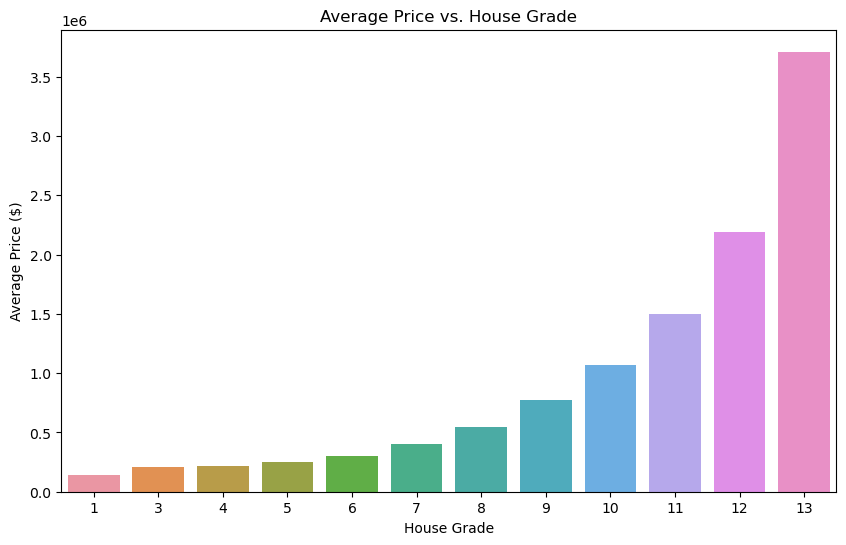

In [17]:
# Feature: House Grade
# Calculate the average price for different house grades
avg_price_per_grade = df.groupby('GRADE')['PRICE'].mean()

# Plot the average price per house grade
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_grade.index, y=avg_price_per_grade.values)
plt.title('Average Price vs. House Grade')
plt.xlabel('House Grade')
plt.ylabel('Average Price ($)')
plt.show()

### Living Space and Price

The square footage of living space directly influences a property's value. We'll use scatter plots to show how the relationship between living space and price manifests.

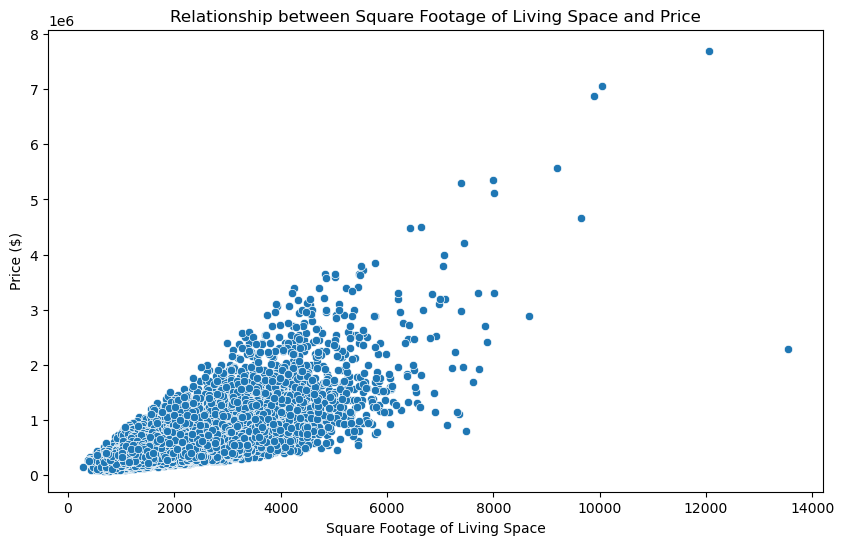

In [18]:
# Feature: Square Footage of Living Space
# Plot the relationship between square footage of living space and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SQFT_LIVING', y='PRICE', data=df)
plt.title('Relationship between Square Footage of Living Space and Price')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price ($)')
plt.show()

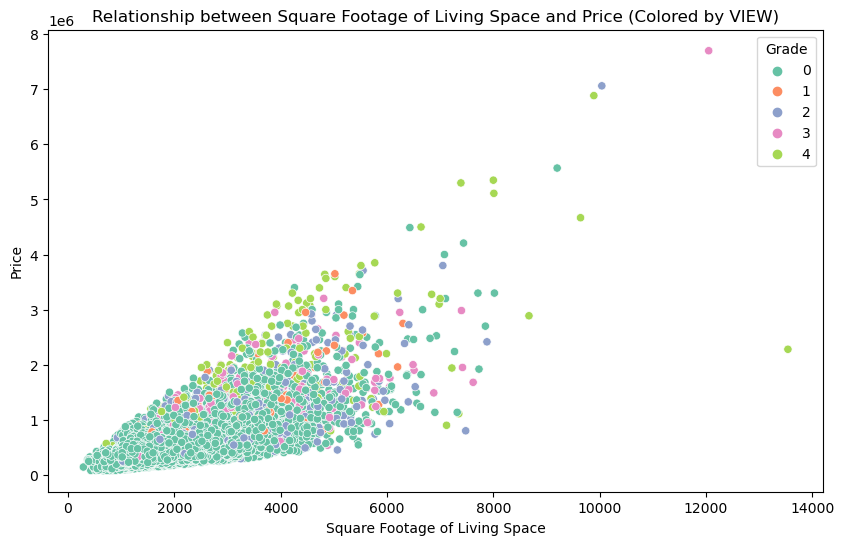

In [19]:
# Create a scatter plot of Square Footage of Living Space vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SQFT_LIVING', y='PRICE', hue='VIEW', palette='Set2')
plt.title('Relationship between Square Footage of Living Space and Price (Colored by VIEW)')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.legend(title='Grade')
plt.show()

### Renovation and Condition

Property condition and renovations can significantly affect a house's value. We'll analyze how these factors impact prices and present the results using bar plots.

In [21]:
# Impact of Renovation and Condition on House Prices

# Group data by condition and calculate the average price for each condition
avg_price_by_condition = df.groupby('CONDITION')['PRICE'].mean()

# Categorize renovations as "No Renovation" and "Renovation"
df['RENOVATION_STATUS'] = df['YR_RENOVATED'].apply(lambda year: 'Renovation' if year > 0 else 'No Renovation')

In [22]:
df[['RENOVATION_STATUS', 'YR_RENOVATED']].head(10)

,RENOVATION_STATUS,YR_RENOVATED
0,No Renovation,0
1,Renovation,1991
2,No Renovation,0
3,No Renovation,0
4,No Renovation,0
5,No Renovation,0
6,No Renovation,0
7,No Renovation,0
8,No Renovation,0
9,No Renovation,0


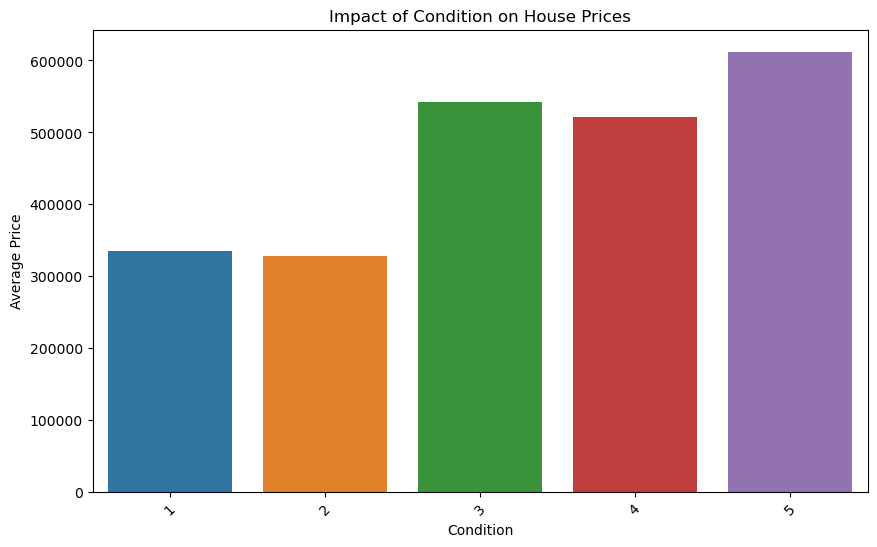

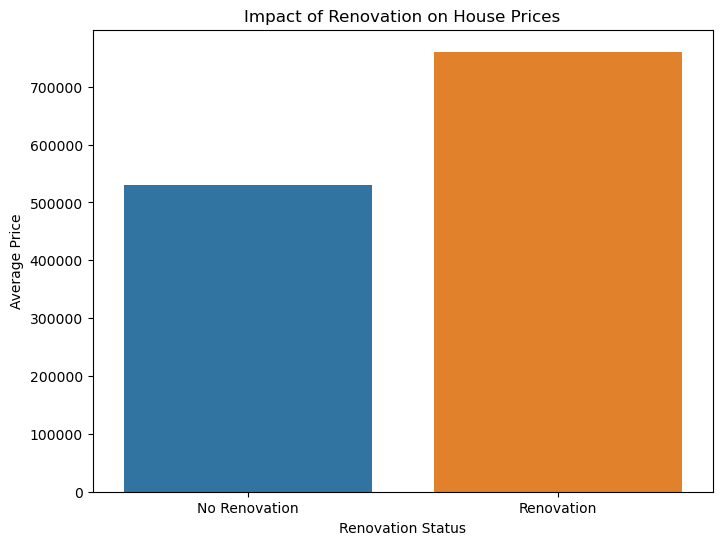

In [23]:
# Group data by renovation status and calculate the average price for each status
avg_price_by_renovation = df.groupby('RENOVATION_STATUS')['PRICE'].mean()

# Visualization: Impact of Condition on House Prices
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_condition.index, y=avg_price_by_condition.values)
plt.title('Impact of Condition on House Prices')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


# Visualization: Impact of Renovation on House Prices
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_renovation.index, y=avg_price_by_renovation.values)
plt.title('Impact of Renovation on House Prices')
plt.xlabel('Renovation Status')
plt.ylabel('Average Price')
plt.show()

## Preliminary Data Exploration for Deep Learning Preparation
In data science and predictive modeling, understanding your dataset is crucial. Before creating a deep-learning model for real estate price prediction, start with thorough analysis. This analysis guides your decisions and reveals hidden patterns, relationships, and insights in the data.

### Purpose of Analysis
Think of it like building a house - you need to know the terrain and materials. Similarly, a data scientist studies data before making models. This analysis has these key goals:

**Feature Understanding:** Know each feature's distribution, range, and behavior. This helps select relevant features for modeling.

**Feature Relationships:** Understand how features interact and affect predictions. Visualize correlations, dependencies, and trends.

**Identifying Outliers:** Outliers can affect predictions. Use histograms and scatter plots to find anomalies.

**Feature Selection:** Not all features matter equally. Correlation insights help choose influential features for accurate modeling.

**Validate Assumptions:** The analysis checks data assumptions, giving a clearer understanding of dataset intricacies.

**Better Model Design:** Understand data characteristics for a well-suited deep learning model.

This analysis is essential for accurate and robust real estate price prediction. Histograms, heatmaps, and correlation charts reveal data potential, ensuring a knowledgeable and insightful foundation for the predictive model.

### Feature Distribution Histograms
We start by looking at histograms that show how different features are distributed. Histograms provide a concise overview of data distribution. Analyzing these histograms helps us understand the central tendency, spread, and potential outliers within each feature. This step helps us grasp the data characteristics before we start building our model.

<Figure size 2000x2000 with 0 Axes>

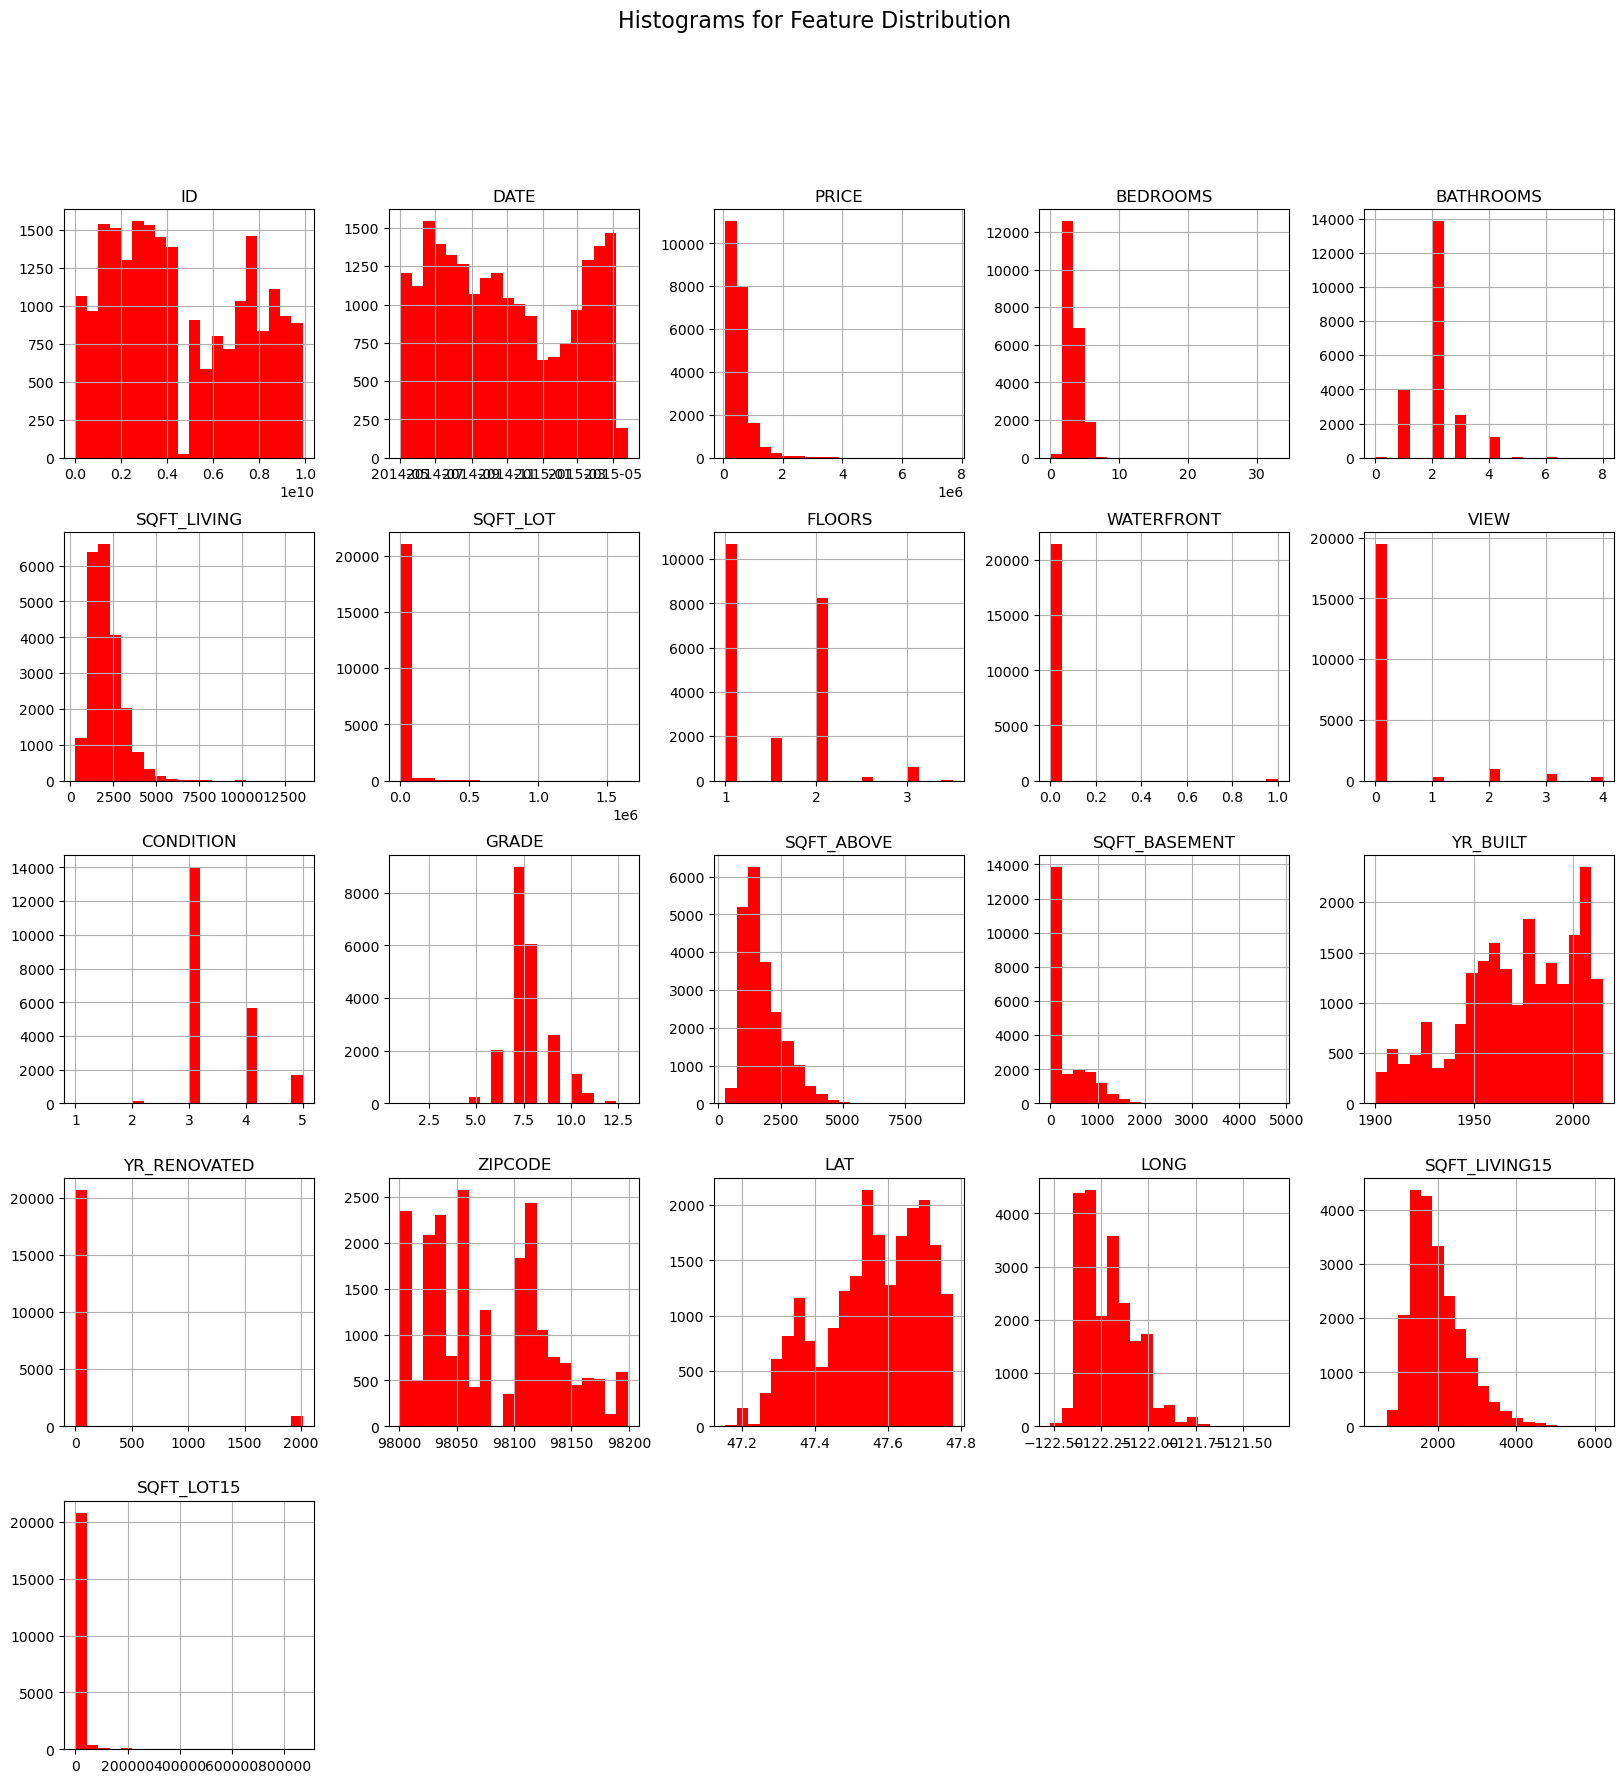

In [24]:
# Display histograms for various features to understand their distribution
plt.figure(figsize=(20, 20))
df.hist(bins=20, figsize=(20, 20), color='r')
plt.suptitle('Histograms for Feature Distribution', fontsize=16)
plt.show()

# Reason: Histograms provide a visual overview of the distribution of each feature.
# This helps in understanding the spread and range of data in each feature.
# It can reveal insights into data skewness, central tendency, and potential outliers.

### Feature Relationships: Correlation Heatmap
Correlation is a key concept in data analysis. A correlation heatmap visually displays how features are related. This heatmap uses colors to show positive and negative relationships between features. By exploring this heatmap, we can identify potential connections and interactions that might impact real estate prices. This insight guides us in selecting important features for our predictive model and detecting multicollinearity.

/tmp/ipykernel_32/2851393178.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


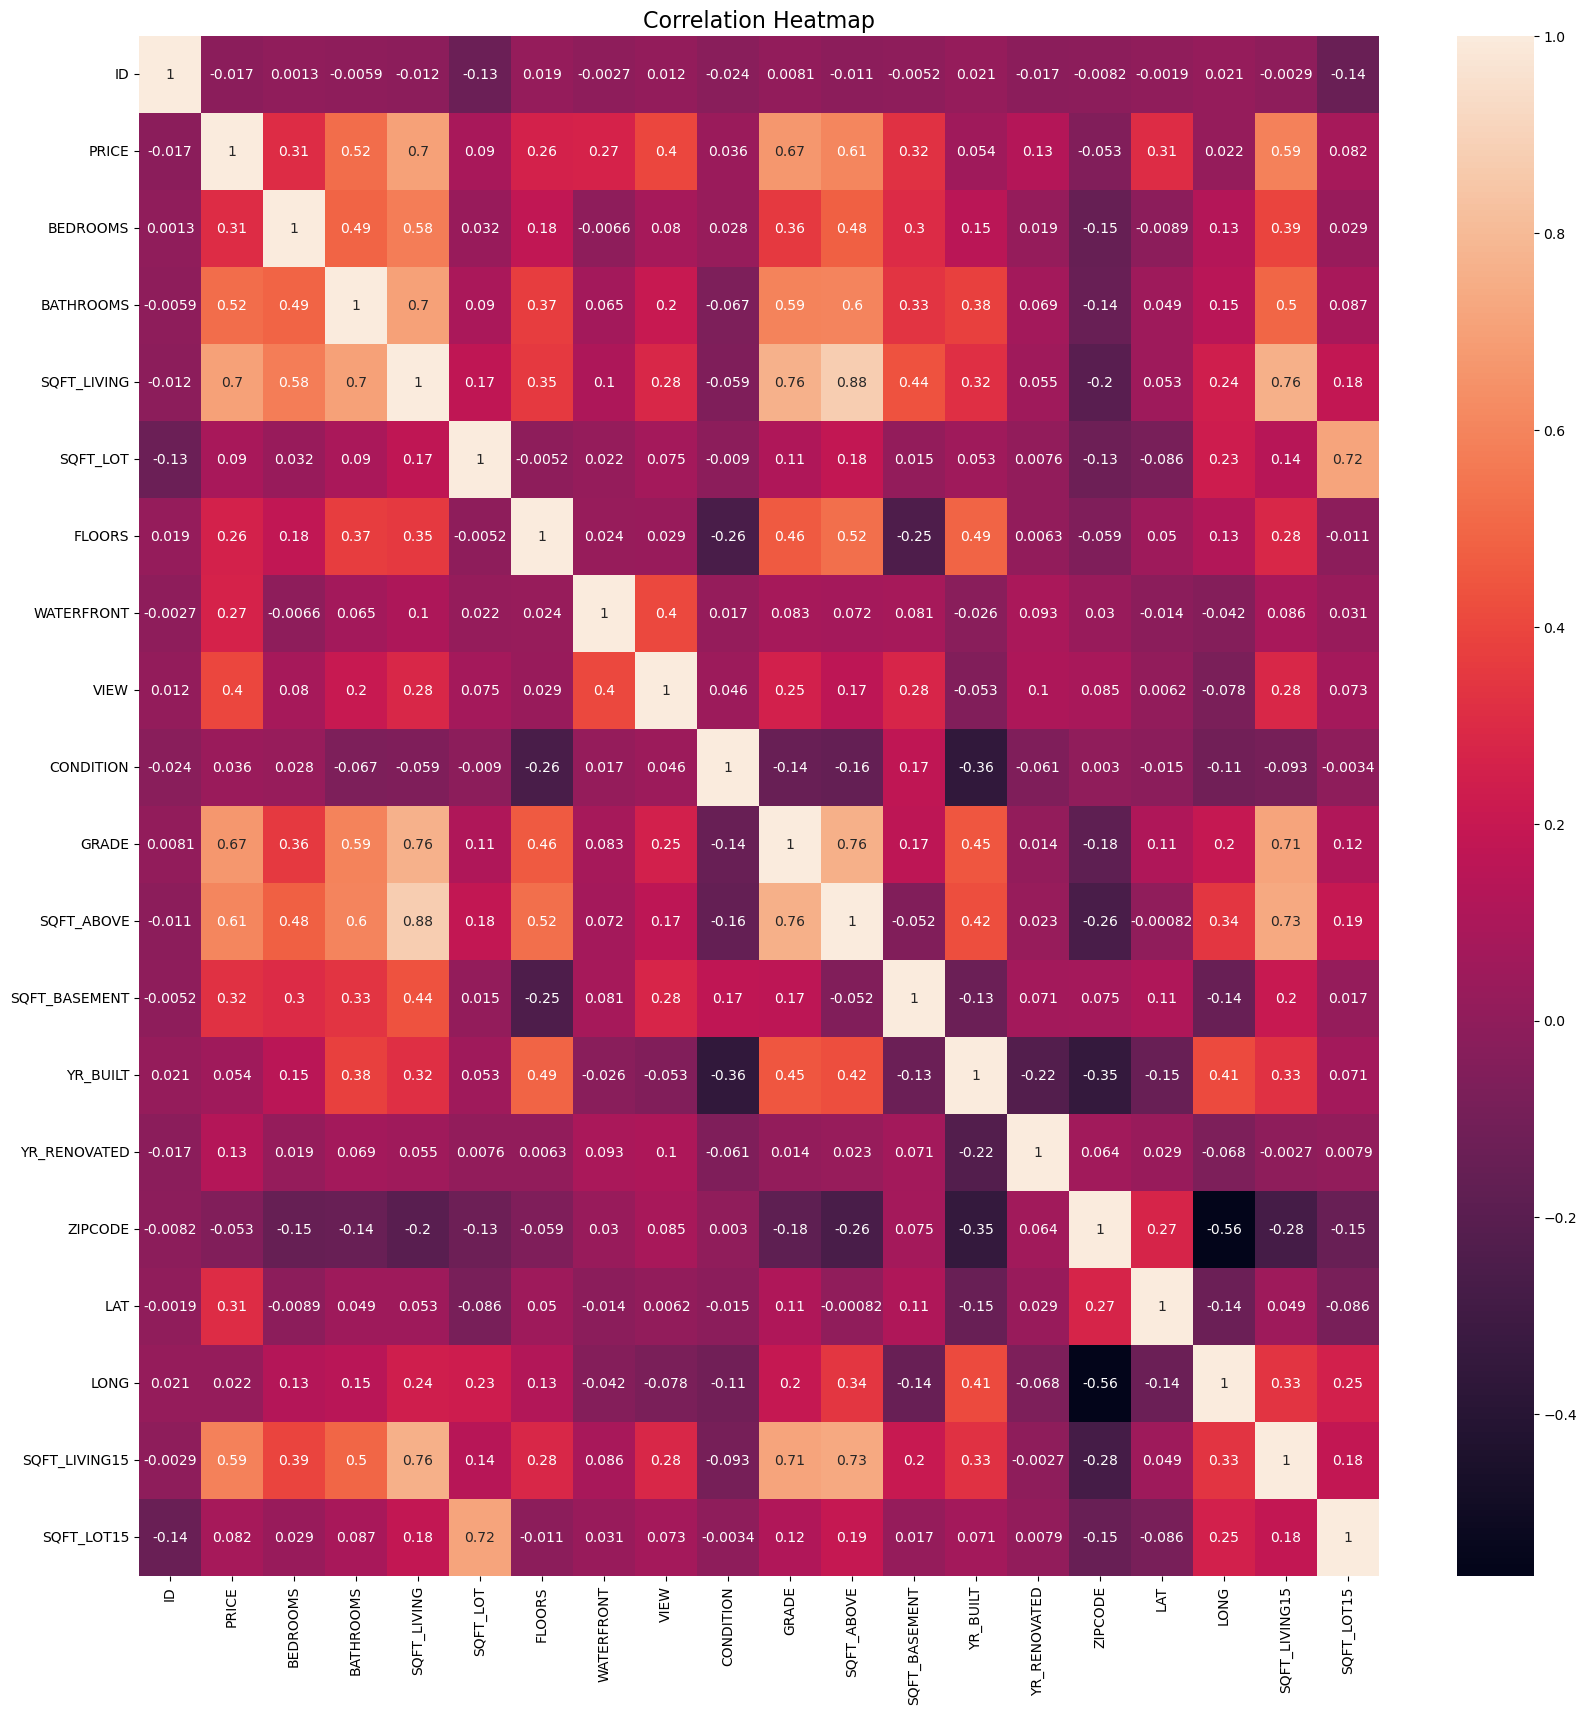

In [25]:
# Create a heatmap to visualize the correlation between different features
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Reason: A correlation heatmap helps us understand the relationships between features.
# Positive or negative correlations between features can provide insights into
# potential dependencies that impact house prices. This aids in feature selection
# for predictive modeling and identifying multicollinearity.

### Correlation Between 'PRICE' and Other Features
We focus on the correlation between the 'PRICE' feature and other attributes. Calculating correlation coefficients between 'PRICE' and each feature (excluding 'LONG', 'LAT', and 'ID'), we present the results in a vertical bar chart. This chart highlights the features that strongly influence real estate prices. Interpreting these correlations helps us with feature selection and model building.

/tmp/ipykernel_32/1950107760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_correlations = df.corr()['PRICE'].drop(['PRICE','LONG','LAT','ID', 'ZIPCODE'],  errors='ignore')


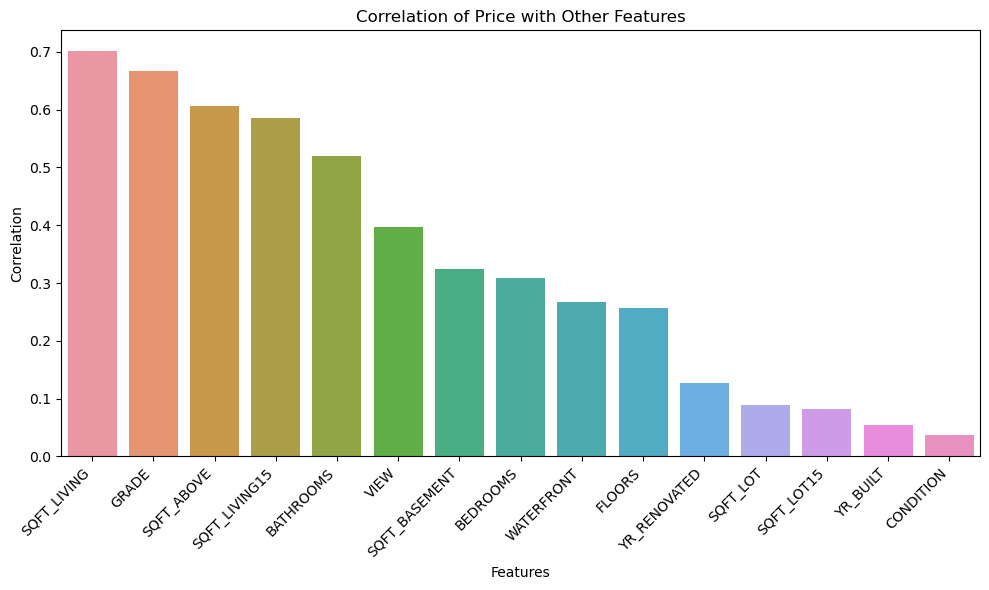

In [27]:
# Calculate correlations of 'PRICE' with other features
price_correlations = df.corr()['PRICE'].drop(['PRICE','LONG','LAT','ID', 'ZIPCODE'],  errors='ignore')

# Sort correlations in descending order
sorted_correlations = price_correlations.sort_values(ascending=False)

# Create a vertical bar chart to visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values)
plt.title('Correlation of Price with Other Features')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Deep Learning Model

### Prepare Data for Training
In the realm of data science, the quality of data greatly impacts model outcomes. A well-prepared dataset is crucial for building accurate models. Here, we outline the essential steps for preparing data before training a deep learning model.

**Feature Selection**
We carefully choose relevant features that significantly influence real estate prices. These selected features, such as bedrooms, bathrooms, and square footage, become the model's input (X).

In [28]:
# List of selected features for input (X)
selected_features = ['BEDROOMS', 'BATHROOMS', 'SQFT_LIVING', 'SQFT_LOT', 'FLOORS', 'SQFT_ABOVE', 'SQFT_BASEMENT']
X = df[selected_features]
# Target variable (y)
y = df['PRICE']

**Scaling Features and Target** To ensure fair comparison, we use Min-Max Scaling to standardize features and the target variable, 'PRICE' to a common scale, enabling the model to treat each feature equally during training.

In [29]:
# Feature Scaling using Min-Max Scaling
scaler = MinMaxScaler()

# Scaling the input features (X)
X_scaled = scaler.fit_transform(X)

# Scaling the target variable (y)

y = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

**Train-Test Split**
We divide the dataset into training and testing sets. The training set is used for model training, while the testing set evaluates the model's predictive abilities.

In [30]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

# Display the sizes of the training and testing data
print("Size of training data:", X_train.shape[0])
print("Size of testing data:", X_test.shape[0])

Size of training data: 16209
Size of testing data: 5404


Our data is now primed for deep learning model training. These steps establish a strong foundation for accurate real estate price predictions. We're prepared to move forward with model training and validation.

## Building and Training Deep Learning Model

With our data prepared and our insights honed, we're now ready to create and train a deep learning model—a powerful tool that can harness the complexity of our dataset to predict real estate prices. For those less familiar with deep learning, let's take a moment to understand the key concepts and steps involved.

### Understanding Deep Learning: A Brief Primer

Deep learning is a subset of machine learning that involves the use of artificial neural networks, which are inspired by the human brain's structure. These networks consist of layers—building blocks that process and transform data. The core layers include:

- **Input Layer**: The entry point for data into the network. It receives the features of our dataset.

- **Hidden Layers**: Intermediary layers that process data through a series of mathematical operations. Each layer extracts different levels of abstraction from the input.

- **Output Layer**: The final layer that produces the model's prediction or classification result.


**Creating the Deep Learning Model**

In the code, we're using the Keras library to create a Sequential model. This type of model allows us to stack layers in a linear sequence. Each `model.add()` call represents adding a layer to the network. The input_dim=7 specifies that each input sample should have 7 features in the input layer. This layer uses the 'relu' (Rectified Linear Unit) activation function, a common choice for introducing non-linearity.

**Model Architecture and Complexity**

The hidden layers consist of 100 neurons each. These layers, with 'relu' activation functions, enable the model to capture intricate relationships within the data. The output layer, consisting of a single neuron with a 'linear' activation function, predicts the continuous target variable: real estate prices.


In [31]:
# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(100, input_dim=7, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


**Compiling the Model**

Compiling the model involves configuring its learning process. We specify the optimizer—'Adam', a popular optimization algorithm—and the loss function—'mean_squared_error', a common choice for regression tasks. The loss function quantifies how far off our predictions are from the actual values.

In [32]:
# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

### Training the Model

To train the model, we use the `model.fit()` function with the scaled training data (`X_train` and `y_train`). The model adjusts its parameters over a specified number of epochs, minimizing the loss function. The `batch_size` determines how many training examples are used per iteration, aiding optimization.

During training, the model improves its predictions. Monitoring validation loss, measured on a subset of unused training data, helps prevent overfitting—when the model just memorizes data rather than generalizing.

In [33]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 2s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 9.9038e-04 - val_loss: 0.0010
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 9.8651e-04 - val_loss: 0.0010
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 9.6223e-04 - val_loss: 0.0011
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 9.8126e-04 - val_loss: 0.0011
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 9.7495e-04 - val_loss: 0.0010
Epoch 10/100
260/260 [==============================] - 1s 3ms/step - l

### Plotting Loss Progress

In the field of deep learning, training a model involves an ongoing process where it improves its predictions by learning from data. An important measure of this progress is the loss function, which shows how well the model's predictions match the actual values. As we go through training iterations (epochs), the loss should ideally decrease, indicating better model performance. This section presents a visualization of training and validation loss changes over epochs, providing insights into the model's learning behavior.

**Understanding the Loss Function**
The loss function guides the model toward accurate predictions. It quantifies the difference between predicted and actual values. The aim is to minimize this difference, reducing the loss, as training advances. Plotting the loss over epochs helps us see how the model grasps the data.

**Visualizing Learning Dynamics**
In the following visualization, we show how the model's loss changes over epochs. The x-axis represents epochs, while the y-axis shows the loss value. Two lines are plotted: 'Training Loss' and 'Validation Loss'. The first line reflects the model's learning from training data, and the second evaluates its performance on unseen validation data.

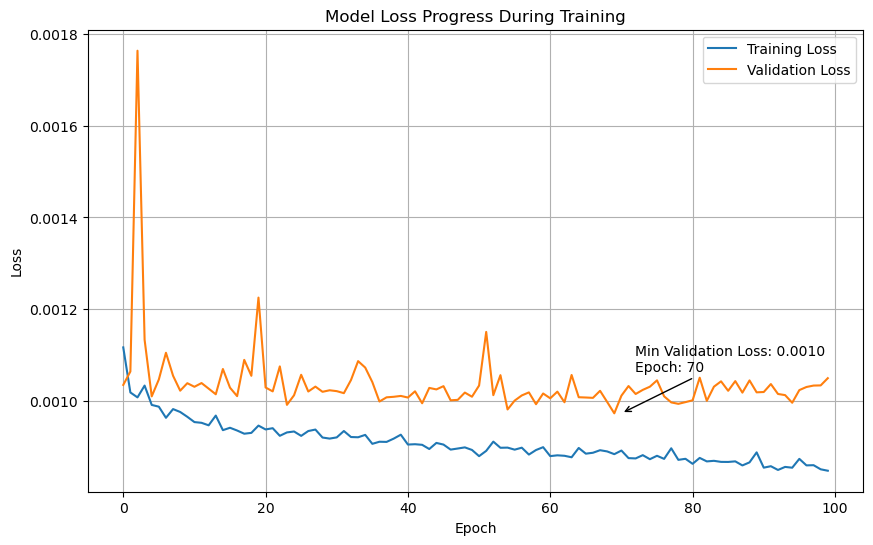

In [34]:
# Plot the training and validation loss progress over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs_hist.history['loss'], label='Training Loss')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Annotate the plot with key information
min_val_loss = min(epochs_hist.history['val_loss'])
min_val_loss_epoch = epochs_hist.history['val_loss'].index(min_val_loss) + 1
plt.annotate(f'Min Validation Loss: {min_val_loss:.4f}\nEpoch: {min_val_loss_epoch}',
             xy=(min_val_loss_epoch, min_val_loss), xycoords='data',
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.grid(True)
plt.show()

**Interpreting the Plot**

The paths of these two lines provide crucial insights:

- A decrease in both lines indicates the model is learning and adjusting its predictions.
- A sudden drop in training loss coupled with a rise in validation loss may suggest overfitting, where the model becomes too tailored to training data.

### Model Prediction and Evaluation
In the field of data science and predictive modeling, it's important to compare a model's predictions with the actual real-world values. This helps us understand how well the model performs in practical terms. In this section, we'll plot the model's predictions against the true values and discuss what the plot reveals about the model's performance.

169/169 [==============================] - 0s 1ms/step


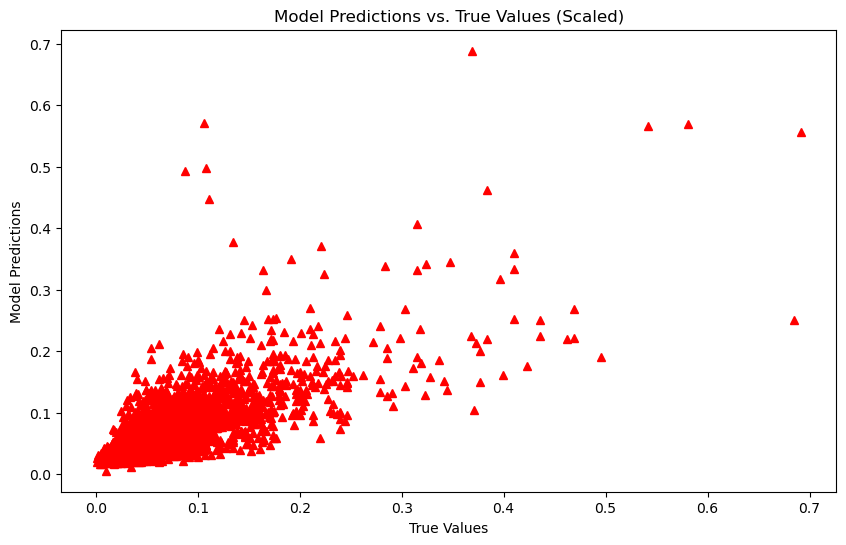

In [35]:
# Predict house prices using the trained model on the test data
y_predict = model.predict(X_test)

# Plot Model Predictions vs. True Values (Scaled)
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_predict, "^", color='r')
plt.title('Model Predictions vs. True Values (Scaled)')
plt.xlabel('True Values')
plt.ylabel('Model Predictions')
plt.show()

**Scaling and Transformation Reminder**

Earlier, we scaled both the input features and the target variable for fair comparison and effective learning. To interpret the model's predictions in real-world terms, we need to reverse this transformation. The `scaler.inverse_transform()` function does this, allowing us to see the results in their original units, like dollars for real estate prices.

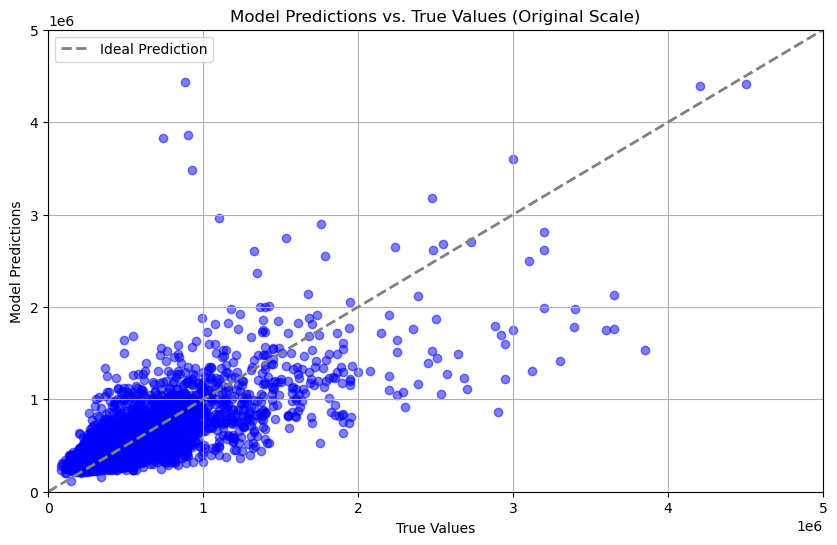

In [36]:
# Plot Model Predictions vs. True Values (Original Scale)
# Inverse Transform Predictions and True Values to Original Scale
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

# Plot Model Predictions vs. True Values with Enhancements
plt.figure(figsize=(10, 6))

# Scatter plot of predictions vs. true values
plt.scatter(y_test_orig, y_predict_orig, color='blue', alpha=0.5)
plt.plot([0, 5000000], [0, 5000000], linestyle='--', color='gray', linewidth=2, label='Ideal Prediction')

# Axis labels and limits
plt.title('Model Predictions vs. True Values (Original Scale)')
plt.xlabel('True Values')
plt.ylabel('Model Predictions')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)

# Legend
plt.legend()

# Grid lines
plt.grid(True)

plt.show()

**Understanding the Plot**

Here's what the plot tells us:

- Points close to the dashed line indicate accurate predictions.
- Points above the dashed line mean the model underestimated, while points below mean it overestimated.
- Points scattered around the dashed line show different levels of accuracy across price ranges.

### Model Performance Evaluation Metrics
In this section, we assess the performance of our deep learning model using key metrics. These metrics help us understand how well the model predicts real estate prices.

Performance metrics gauge the quality of a predictive model's output. They show how well the model's predictions match actual values. By quantifying prediction errors, we can measure accuracy, precision, and overall effectiveness.

These metrics collectively reveal the model's strengths and limitations, guiding decisions about its predictive reliability. They are essential for refining and validating the deep learning model. The following code snippets show these metrics in action.

- **Root Mean Squared Error (RMSE)**
RMSE calculates the average magnitude of prediction errors. It's the square root of average squared differences between predicted and actual values. A lower RMSE indicates a better fit between predictions and reality.

- **Mean Squared Error (MSE)**
MSE calculates the average of squared prediction errors, providing insight into model deviations from true values. Lower MSE indicates greater accuracy.

- **Mean Absolute Error (MAE)**
MAE focuses on absolute differences between predicted and actual values. It averages these differences, showing the model's average error magnitude. A lower MAE implies better predictive accuracy.

- **R-squared (COD)**
R-squared measures how much variance in the target variable the model explains. Higher R-squared suggests better predictive capability.

- **Adjusted R-squared**
Adjusted R-squared considers R-squared and the number of features. It offers a nuanced view of model fit while penalizing excessive feature use.


In [37]:
# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(mean_squared_error(y_test_orig, y_predict_orig))

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_test_orig, y_predict_orig)

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test_orig, y_predict_orig)

# Calculate Adjusted R-squared
n = len(y_test_orig)  # Number of observations
k = X_test.shape[1]    # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print the calculated performance metrics
print('RMSE :', RMSE)
print('MSE  :', MSE)
print('MAE  :', MAE)
print('R-squared (R2)     :', r2)
print('Adjusted R-squared :', adj_r2)


RMSE : 256411.3530096374
MSE  : 65746781952.23288
MAE  : 157693.80346444764
R-squared (R2)     : 0.5419616994492251
Adjusted R-squared : 0.541367505953329


# Model Enhancement and Optimization

In the world of predictive modeling, continuous improvement is key. The process of model enhancement and optimization involves refining strategies to boost model performance. Here, we highlight crucial tactics for maximizing predictive power in deep learning models.

**Feature Enrichment**

Enhancing a predictive model begins with expanding the range of features. More features offer a better understanding of underlying data patterns. This section demonstrates adding various features, like living space, bedrooms, or location, to enhance predictive capabilities and capture hidden nuances.

**Architectural Evolution**

The model's architecture shapes its learning process. By adding hidden layers, we introduce complexity and enable the model to learn intricate relationships. A guide is provided for adding layers, enabling the model to grasp dependencies and improve predictive ability.

**Hyperparameter Adjustment**

Fine-tuning a model involves adjusting hyperparameters that govern learning behavior. This includes experimenting with learning rates, activation functions, and optimization methods. Hyperparameter tuning significantly impacts model effectiveness and is a critical step in optimization.

### Data Preprocessing and Feature Selection

In [38]:
# Define the list of selected features for model enhancement
selected_features = ['BEDROOMS', 'BATHROOMS', 'SQFT_LIVING', 'SQFT_LOT', 'FLOORS',
                     'SQFT_ABOVE', 'SQFT_BASEMENT', 'WATERFRONT', 'VIEW', 'CONDITION',
                     'GRADE', 'SQFT_LIVING15', 'SQFT_LOT15', 'YR_BUILT', 'YR_RENOVATED',
                     'SQFT_ABOVE','ZIPCODE', 'LAT', 'LONG']

X = df[selected_features]

# Target variable (y)
y = df['PRICE']

# Data Preparation for Deep Learning
# -----------------------------------

# Feature Scaling using Min-Max Scaling
scaler = MinMaxScaler()

# Scaling the input features (X)
X_scaled = scaler.fit_transform(X)

# Scaling the target variable (y)
y = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

# Splitting the Data into Training and Testing Sets
# -----------------------------------------------

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

# Display the sizes of the training and testing data
print("Size of training data:", X_train.shape[0])
print("Size of testing data:", X_test.shape[0])

Size of training data: 16209
Size of testing data: 5404


### Enhanced Deep Learning Model

In [39]:

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

# Display model summary
model.summary()

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model using the training data with enhanced configuration
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

# - epochs: Number of training epochs (iterations)
# - batch_size: Number of samples in each batch for gradient updates
# - verbose: Controls the amount of progress information displayed during training
# - validation_split: Fraction of training data to use for validation

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                200       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 200)               2200      
                                                                 
 dense_7 (Dense)             (None, 200)               40200     
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 42,911
Trainable params: 42,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
260/260 [=============================

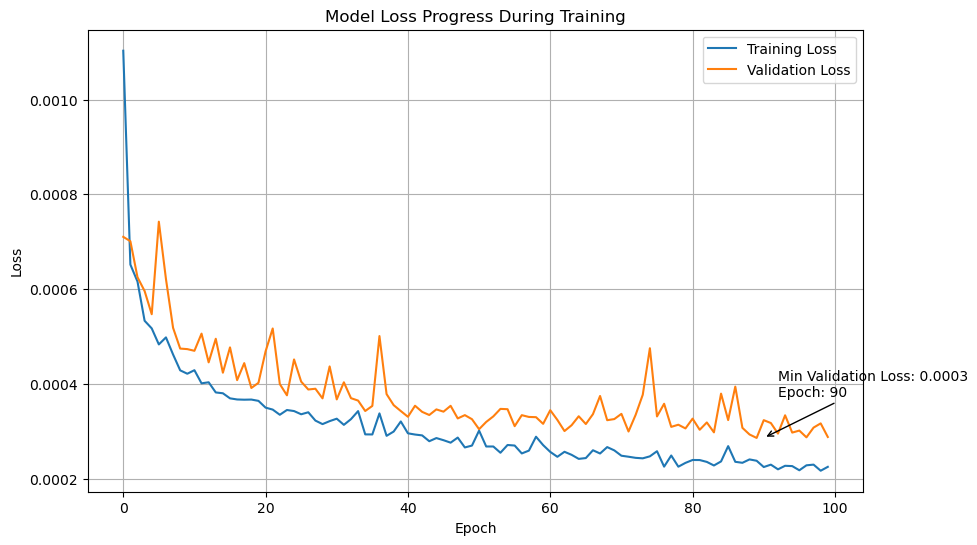

In [40]:
# Plot the training and validation loss progress over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs_hist.history['loss'], label='Training Loss')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Annotate the plot with key information
min_val_loss = min(epochs_hist.history['val_loss'])
min_val_loss_epoch = epochs_hist.history['val_loss'].index(min_val_loss) + 1
plt.annotate(f'Min Validation Loss: {min_val_loss:.4f}\nEpoch: {min_val_loss_epoch}',
             xy=(min_val_loss_epoch, min_val_loss), xycoords='data',
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.grid(True)
plt.show()

### Model Prediction and Evaluation

169/169 [==============================] - 0s 1ms/step


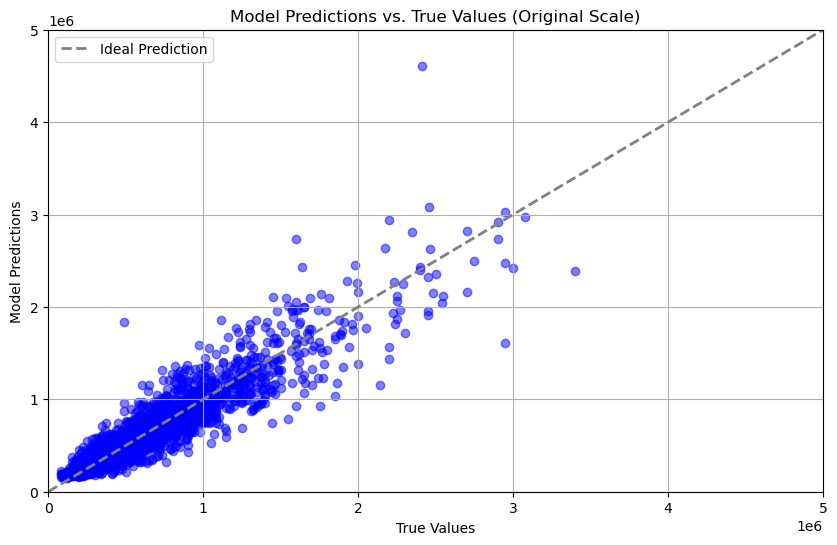

In [41]:
# Predict house prices using the trained model on the test data
y_predict = model.predict(X_test)

# Inverse Transform Predictions and True Values to Original Scale
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

# Plot Model Predictions vs. True Values with Enhancements
plt.figure(figsize=(10, 6))

# Scatter plot of predictions vs. true values
plt.scatter(y_test_orig, y_predict_orig, color='blue', alpha=0.5)
plt.plot([0, 5000000], [0, 5000000], linestyle='--', color='gray', linewidth=2, label='Ideal Prediction')


# Axis labels and limits
plt.title('Model Predictions vs. True Values (Original Scale)')
plt.xlabel('True Values')
plt.ylabel('Model Predictions')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)

# Legend
plt.legend()

# Grid lines
plt.grid(True)

plt.show()

### Model Performance Evaluation Metrics

In [42]:
# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(mean_squared_error(y_test_orig, y_predict_orig))

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_test_orig, y_predict_orig)

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test_orig, y_predict_orig)

# Calculate Adjusted R-squared
n = len(y_test_orig)  # Number of observations
k = X_test.shape[1]    # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print the calculated performance metrics
print('RMSE :', RMSE)
print('MSE  :', MSE)
print('MAE  :', MAE)
print('R-squared (R2)     :', r2)
print('Adjusted R-squared :', adj_r2)

RMSE : 123702.57043553155
MSE  : 15302325932.357645
MAE  : 74591.13040398316
R-squared (R2)     : 0.8628533134179072
Adjusted R-squared : 0.8623693262252883
